# Introduction

**In the article "Which Emotions Do Dogs Actually Experience?" By Stanley Coren (https://moderndogmagazine.com/articles/which-emotions-do-dogs-actually-experience/32883), we can find some tips about Dog Emotion.**

**What We Know about Dog Emotions Now**

Science has clearly progressed a long, long way beyond the thinking of Descartes and Malebranche. We have now come to understand that dogs possess all of the same brain structures that produce emotions in humans. Dogs have the same hormones and undergo the same chemical changes that humans do during emotional states. Dogs even have the hormone oxytocin, which, in humans, is involved with feeling love and affection for others.

With the same neurology and chemistry that people have, it seems reasonable to suggest that dogs also have emotions that are similar to ours. However, it is important to not go overboard and immediately assume that the emotional ranges of dogs and humans are the same.

**Current studies of Dog Emotions**

To understand what dogs feel, we must turn to research done to explore the emotions of humans. It is the case that not all people have the full range of all possible emotions, and, in fact, at some points in your life you did not have the full complement of emotions that you feel and express today. There is much research to demonstrate that infants and very young children have a more limited range of emotions. It is over time that the infant’s emotions begin to differentiate and develop and, by the time they’ve reached adulthood, their range of emotional experiences is quite broad.

Why is such data important to understanding emotional lives of our dogs? Researchers have now come to believe that the mind of a dog is roughly equivalent to that of a human who is two to two-and-a-half years old. This conclusion holds for most mental abilities as well as emotions. Thus, we can look to the human research to see what we might expect of our dogs. Just like a two-year-old child, our dogs clearly have emotions, but many fewer kinds of emotions than found in adult humans.

At birth, a human infant only has an emotion that we might call excitement. This indicates how excited he is, ranging from very calm up to a state of frenzy. Within the first weeks of life the excitement state comes to take on a varying positive or a negative flavour, so we can now detect the general emotions of contentment and distress. In the next couple of months, disgust, fear, and anger become detectable in the infant. Joy often does not appear until the infant is nearly six months of age and it is followed by the emergence of shyness or suspicion. True affection, the sort that it makes sense to use the label “love” for, does not fully emerge until nine or ten months of age.

The complex social emotions—those which have elements that must be learned—don’t appear until much later. Shame and pride take nearly three years to appear, while guilt appears around six months after that. A child is nearly four years of age before she feels contempt.

**The Emotions that Dogs Actually Experience**

This developmental sequence is the golden key to understanding the emotions of dogs. Dogs go through their developmental stages much more quickly than humans do and have all of the emotional range that they will ever achieve by the time they are four to six months of age (depending on the rate of maturation in their breed).

The important fact is that we know that the assortment of emotions available to the dog will not exceed that which is available to a human who is two to two-and-a-half years old. This means that a dog will have all of the basic emotions: joy, fear, anger, disgust, and, yes, love, but the dog does not experience the more complex emotions like guilt, pride, and shame.

Many would argue that they have seen evidence indicating their dog is capable of experiencing guilt. The usual situation recounted is one in which you’ve come home and your dog starts slinking around showing discomfort, and you then find that he has left a smelly brown deposit on your kitchen floor. It is natural to conclude that the dog was acting in a way that shows that he is feeling guilty about his transgression.

Despite appearances, this is not guilt, but simply a display of the more basic emotion of fear. Your dog has learned that when you appear and his droppings are visible on the floor, bad things happen to him. What you see is his fear of punishment; he will never feel guilt because he is not capable of experiencing it.

reference: "Which Emotions Do Dogs Actually Experience?" By Stanley Coren (https://moderndogmagazine.com/articles/which-emotions-do-dogs-actually-experience/32883)

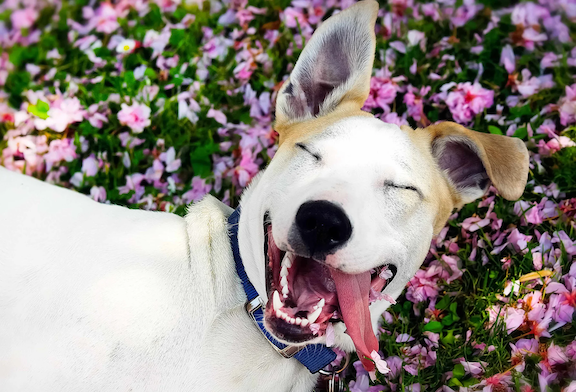

image from https://pursuit.unimelb.edu.au/articles/ever-wondered-what-your-pet-is-thinking

On the other hand, in the article "You Can Identify Your Dog’s Emotion Through Its Facial Expressions" (https://manukavet.com.au/you-can-identify-your-dogs-emotion-through-its-facial-expressions/), we can find how we can identify your dog’s emotion through its facial expressions.

The resulting photographs were shown to 50 volunteers, who were split into two groups according to their experience of dogs. By far the easiest emotion they recognised was happiness, with 88 per cent of the volunteers correctly identifying it. Anger was identified by 70 per cent of participants. About 45 per cent of volunteers spotted when Mal was frightened, while 37 per cent could identify the relatively subtle emotion of sadness.

Accordintg to the article, especially, identifying sadness seems to be more difficult.

reference: "You Can Identify Your Dog’s Emotion Through Its Facial Expressions" (https://manukavet.com.au/you-can-identify-your-dogs-emotion-through-its-facial-expressions/)

So I tried to model to classify dog emotion by MobileNetV2 & VGG16. For coding, I refered 'Real vs Fake face detection' by DEBASIS SAMAL( https://www.kaggle.com/code/debasisdotcom/real-vs-fake-face-detection ). Thank you for shraing!

# Importing

In [1]:
#Code by 'Real vs Fake face detection' https://www.kaggle.com/code/debasisdotcom/real-vs-fake-face-detection

import numpy as np
import pandas as pd
from keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense,BatchNormalization, Flatten, MaxPool2D
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, Callback
from keras.layers import Conv2D, Reshape
from tensorflow.keras.utils import Sequence
from keras.backend import epsilon
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
import cv2

from tqdm.notebook import tqdm_notebook as tqdm

import os

# Data Preprocessing

In [2]:
#Code by 'Real vs Fake face detection' https://www.kaggle.com/code/debasisdotcom/real-vs-fake-face-detection

print(os.listdir("../input"))

['dog-emotions-prediction']


In [3]:
#Code by 'Real vs Fake face detection' https://www.kaggle.com/code/debasisdotcom/real-vs-fake-face-detection

angry= '../input/dog-emotions-prediction/images/angry/'
sad = '../input/dog-emotions-prediction/images/sad/'
relaxed = '../input/dog-emotions-prediction/images/relaxed/'
happy = '../input/dog-emotions-prediction/images/happy/'


angry_path = os.listdir(angry)
sad_path = os.listdir(sad)
relaxed_path = os.listdir(relaxed)
happy_path = os.listdir(happy)

# Sample Images

In [4]:
#Code by 'Real vs Fake face detection' https://www.kaggle.com/code/debasisdotcom/real-vs-fake-face-detection

def load_img(path):
    image = cv2.imread(path)
    image = cv2.resize(image,(224, 224))
    return image[...,::-1]

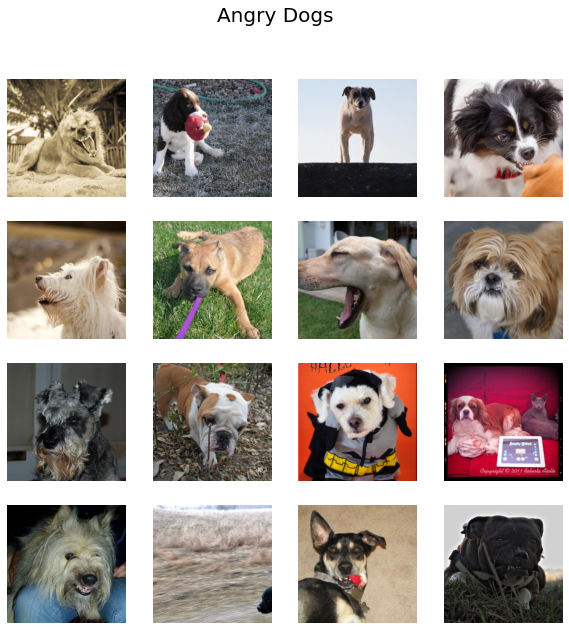

In [5]:
#Code by 'Real vs Fake face detection' https://www.kaggle.com/code/debasisdotcom/real-vs-fake-face-detection

fig = plt.figure(figsize=(10, 10))

for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(load_img(angry + angry_path[i]), cmap='gray')
    plt.suptitle("Angry Dogs",fontsize=20)
    plt.axis('off')

plt.show()

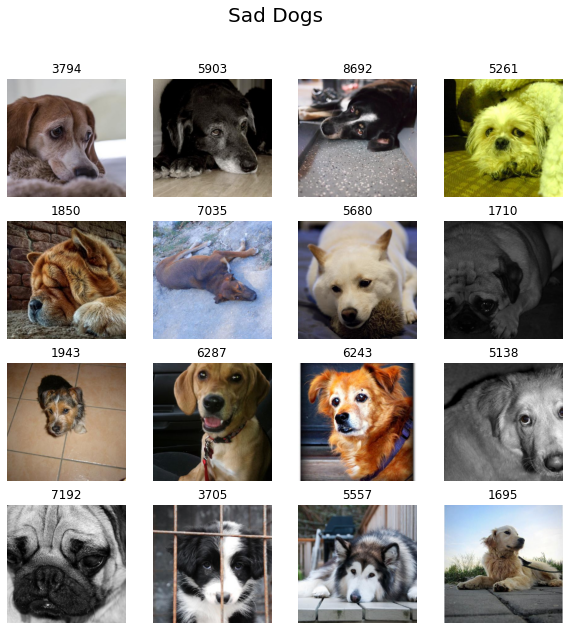

In [6]:
#Code by 'Real vs Fake face detection' https://www.kaggle.com/code/debasisdotcom/real-vs-fake-face-detection

fig = plt.figure(figsize=(10,10))

for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(load_img(sad + sad_path[i]), cmap='gray')
    plt.suptitle("Sad Dogs",fontsize=20)
    plt.title(sad_path[i][:4])
    plt.axis('off')

plt.show()

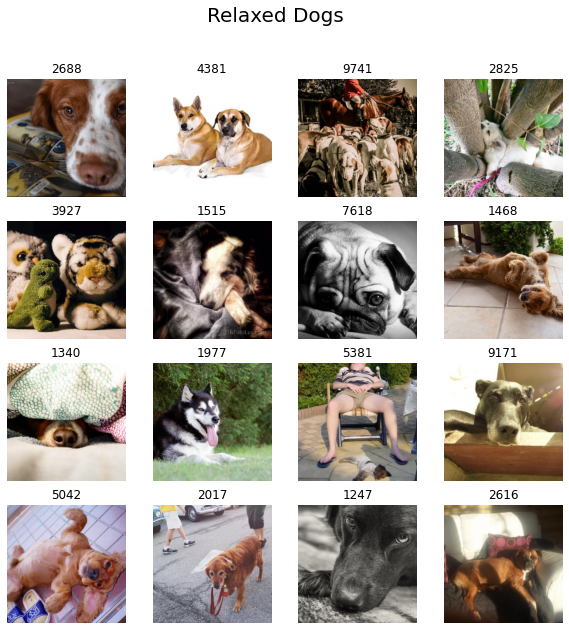

In [7]:
#Code by 'Real vs Fake face detection' https://www.kaggle.com/code/debasisdotcom/real-vs-fake-face-detection

fig = plt.figure(figsize=(10,10))

for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(load_img(relaxed + relaxed_path[i]), cmap='gray')
    plt.suptitle("Relaxed Dogs",fontsize=20)
    plt.title(relaxed_path[i][:4])
    plt.axis('off')

plt.show()

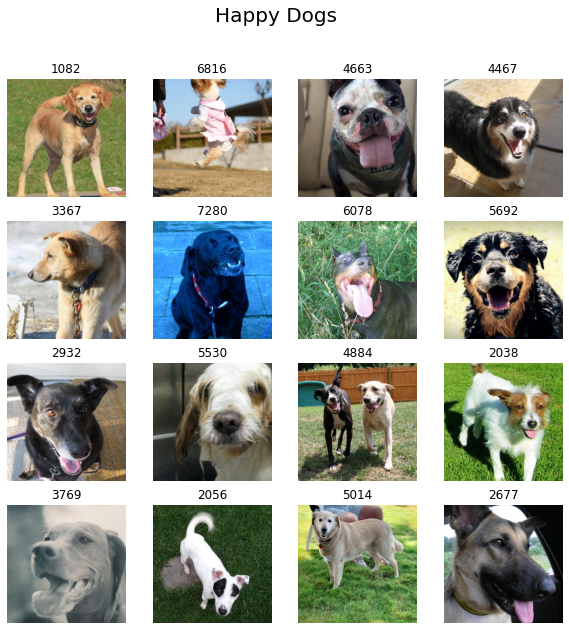

In [8]:
#Code by 'Real vs Fake face detection' https://www.kaggle.com/code/debasisdotcom/real-vs-fake-face-detection

fig = plt.figure(figsize=(10,10))

for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(load_img(happy + happy_path[i]), cmap='gray')
    plt.suptitle("Happy Dogs",fontsize=20)
    plt.title(happy_path[i][:4])
    plt.axis('off')

plt.show()

# Modeling

In [9]:
#Code by 'Real vs Fake face detection' https://www.kaggle.com/code/debasisdotcom/real-vs-fake-face-detection

dataset_path = "/kaggle/input/dog-emotions-prediction/images"

In [10]:
#Code by 'Real vs Fake face detection' https://www.kaggle.com/code/debasisdotcom/real-vs-fake-face-detection

data_with_aug = ImageDataGenerator(horizontal_flip=True,
                                   vertical_flip=False,
                                   rescale=1./255,
                                  validation_split=0.3)

In [11]:
#Code by 'Real vs Fake face detection' https://www.kaggle.com/code/debasisdotcom/real-vs-fake-face-detection

train = data_with_aug.flow_from_directory(dataset_path,
                                          class_mode="binary",
                                          target_size=(96, 96),
                                          batch_size=32,
                                          subset="training")

Found 11147 images belonging to 4 classes.


In [12]:
#Code by 'Real vs Fake face detection' https://www.kaggle.com/code/debasisdotcom/real-vs-fake-face-detection

val = data_with_aug.flow_from_directory(dataset_path,
                                          class_mode="binary",
                                          target_size=(96, 96),
                                          batch_size=32,
                                          subset="validation"
                                          )

Found 4774 images belonging to 4 classes.


# 1) MobileNetV2

In [13]:
#Code by 'Real vs Fake face detection' https://www.kaggle.com/code/debasisdotcom/real-vs-fake-face-detection

mnet = MobileNetV2(include_top = False, weights = "imagenet" ,input_shape=(96,96,3))

9420800/9406464 [==============================] - 1s 0us/step


In [14]:
#Code by 'Real vs Fake face detection' https://www.kaggle.com/code/debasisdotcom/real-vs-fake-face-detection

tf.keras.backend.clear_session()

model = Sequential([mnet,
                    GlobalAveragePooling2D(),
                    Dense(512, activation = "relu"),
                    BatchNormalization(),
                    Dropout(0.3),
                    Dense(128, activation = "relu"),
                    Dropout(0.1),
                    # Dense(32, activation = "relu"),
                    # Dropout(0.3),
                    Dense(4, activation = "sigmoid")])

model.layers[0].trainable = False

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics="accuracy")

model.summary()
Model: "sequential"

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_96 (Functio (None, 3, 3, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               655872    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [15]:
#Code by 'Real vs Fake face detection' https://www.kaggle.com/code/debasisdotcom/real-vs-fake-face-detection

def scheduler(epoch):
    if epoch <= 2:
        return 0.001
    elif epoch > 2 and epoch <= 15:
        return 0.0001 
    else:
        return 0.00001

lr_callbacks = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [16]:
#Code by 'Real vs Fake face detection' https://www.kaggle.com/code/debasisdotcom/real-vs-fake-face-detection

hist = model.fit_generator(train,
                    epochs=20,
                    callbacks=[lr_callbacks],
                    validation_data=val)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
349/349 [==============================] - 201s 552ms/step - loss: 1.4241 - accuracy: 0.4177 - val_loss: 1.2558 - val_accuracy: 0.4411
Epoch 2/20
349/349 [==============================] - 56s 161ms/step - loss: 1.1549 - accuracy: 0.5075 - val_loss: 1.2168 - val_accuracy: 0.5000
Epoch 3/20
349/349 [==============================] - 53s 152ms/step - loss: 1.0684 - accuracy: 0.5507 - val_loss: 1.2332 - val_accuracy: 0.4818
Epoch 4/20
349/349 [==============================] - 51s 147ms/step - loss: 0.9413 - accuracy: 0.6149 - val_loss: 1.1995 - val_accuracy: 0.4962
Epoch 5/20
349/349 [==============================] - 52s 148ms/step - loss: 0.9006 - accuracy: 0.6366 - val_loss: 1.2054 - val_accuracy: 0.4992
Epoch 6/20
349/349 [==============================] - 51s 148ms/step - loss: 0.8704 - accuracy: 0.6507 - val_loss: 1.2245 - val_accuracy: 0.4910
Epoch 7/20
349/349 [==============================] - 52s 150ms/step - loss: 0.8424 - accuracy: 0.6661 - val_loss: 1.2311 - val_a

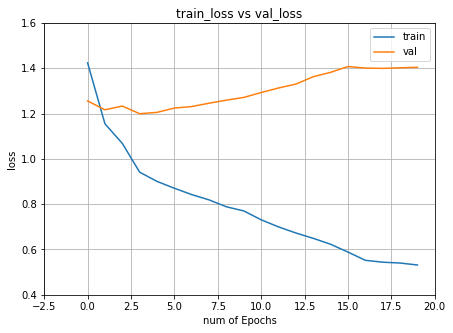

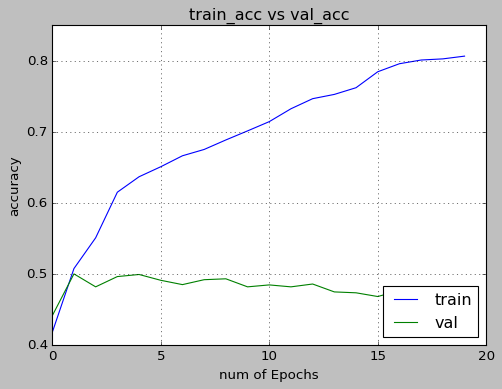

In [17]:
#Code by 'Real vs Fake face detection' https://www.kaggle.com/code/debasisdotcom/real-vs-fake-face-detection

epochs = 20
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
xc = range(epochs)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

# 2) VGG16

In [18]:
#Code by 'Real vs Fake face detection' https://www.kaggle.com/code/debasisdotcom/real-vs-fake-face-detection

train = data_with_aug.flow_from_directory(dataset_path,
                                          class_mode="binary",
                                          target_size=(224, 224),
                                          batch_size=98,
                                          subset="training")

val = data_with_aug.flow_from_directory(dataset_path,
                                          class_mode="binary",
                                          target_size=(224, 224),
                                          batch_size=98,
                                          subset="validation"
                                          )

Found 11147 images belonging to 4 classes.
Found 4774 images belonging to 4 classes.


In [19]:
#Code by 'Real vs Fake face detection' https://www.kaggle.com/code/debasisdotcom/real-vs-fake-face-detection

vgg16_model = tf.keras.applications.vgg16.VGG16(include_top=False, weights="imagenet", input_shape=(224,224,3))

58900480/58889256 [==============================] - 3s 0us/step


In [20]:
#Code by 'Real vs Fake face detection' https://www.kaggle.com/code/debasisdotcom/real-vs-fake-face-detection

vgg16_model.output[-1]

<KerasTensor: shape=(7, 7, 512) dtype=float32 (created by layer 'tf.__operators__.getitem')>

In [21]:
#Code by 'Real vs Fake face detection' https://www.kaggle.com/code/debasisdotcom/real-vs-fake-face-detection

# model = Sequential()
# for layer in vgg16_model.layers[:-1]:
#     model.add(layer)

# for layer in model.layers:
#     layer.trainable = False
    
# model.add(Dense(2, activation='softmax'))


model = Sequential([vgg16_model,
                    Flatten(),
#                     GlobalAveragePooling2D(),
#                     Dense(512, activation = "relu"),
#                     BatchNormalization(),
#                     Dropout(0.3),
#                     Dense(128, activation = "relu"),
#                     Dropout(0.1),
#                     # Dense(32, activation = "relu"),
#                     # Dropout(0.3),
                    Dense(4, activation = "sigmoid")])

model.layers[0].trainable = False

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics="accuracy")

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 100356    
Total params: 14,815,044
Trainable params: 100,356
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
#Code by 'Real vs Fake face detection' https://www.kaggle.com/code/debasisdotcom/real-vs-fake-face-detection

hist =  model.fit_generator(train,
                    epochs=20,
                    callbacks=[lr_callbacks],
                    validation_data=val)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
114/114 [==============================] - ETA: 0s - loss: 1.3866 - accuracy: 0.4241

In [ ]:
#Code by 'Real vs Fake face detection' https://www.kaggle.com/code/debasisdotcom/real-vs-fake-face-detection

epochs = 20
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
xc = range(epochs)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

In [ ]:
#Code by 'Real vs Fake face detection' https://www.kaggle.com/code/debasisdotcom/real-vs-fake-face-detection

#Creating an array of predicted test images

predictions = model.predict_generator(val)

In [ ]:
#Code by 'Real vs Fake face detection' https://www.kaggle.com/code/debasisdotcom/real-vs-fake-face-detection

val_path = "/kaggle/input/dog-emotions-prediction/images/"

plt.figure(figsize=(15,15))

start_index = 250

for i in range(16):
  plt.subplot(4,4, i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  preds = np.argmax(predictions[[start_index+i]])
    
  gt = val.filenames[start_index+i][9:13]

  
  if gt == "angry":
    gt = 0
  elif gt == 'sad':
    gt = 1
  elif gt == 'pleased':
    gt = 2
  else:
    gt = 3
    
  if preds != gt:
    col ="r"
  else:
    col = "g"

  plt.xlabel('i={}, pred={}, gt={}'.format(start_index+i,preds,gt),color=col)
  plt.imshow(load_img(val_path+val.filenames[start_index+i]))
  plt.tight_layout()

plt.show()

Thank you !